# Visualize circuits

A visualization is useful while working with quantum circuits. Below find options in Qiskit&reg; for drawing circuits, plotting data from executed jobs, seeing the state of a quantum computer, and more.

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

## Draw a quantum circuit

Drawing a circuit is supported natively by a `QuantumCircuit` object. You can either call `print()` on the circuit, or call the `draw()` method on the object. This will render an ASCII art version of the circuit diagram.

In [2]:
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)

circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));

In [3]:
print(circuit)

     ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1 


In [4]:
circuit.draw()

┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1

### Alternative renderers

A text output is useful for quickly seeing the output while developing a circuit, but it doesn't provide the most flexibility. There are two alternative output renderers for the quantum circuit. One uses [matplotlib](https://matplotlib.org/), and the other uses [LaTeX](https://www.latex-project.org/), which leverages the [qcircuit package](https://github.com/CQuIC/qcircuit). These can be specified with `mpl` and `latex` values for the `output` kwarg on the draw() method.

<Admonition type="tip">
  OSX users can get the required LaTeX packages through the [mactex package](https://www.tug.org/mactex/)
</Admonition>

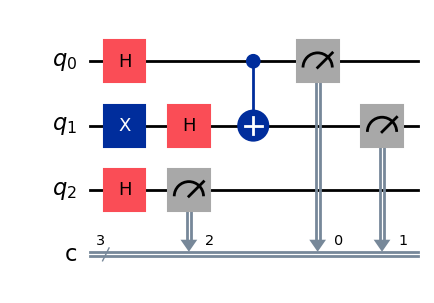

In [5]:
# Matplotlib drawing
circuit.draw(output='mpl')

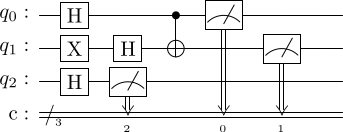

In [6]:
# Latex drawing
circuit.draw(output='latex')

### Control output from circuit.draw()

By default, the `draw()` method returns the rendered image as an object and does not output anything. The exact class returned depends on the output specified: `'text'` (the default) returns a `TextDrawer` object, `'mpl'` returns a `matplotlib.Figure` object, and `latex` returns a `PIL.Image` object. These return types enable modifying or directly interacting with the rendered output from the drawers.

Jupyter notebooks understand these return types and render them properly, but when running outside of Jupyter, this feature is not automatic. However, the `draw()` method has optional arguments to display or save the output. When specified, the `filename` kwarg takes a path to which it saves the rendered output. Alternatively, if you're using the `mpl` or `latex` outputs, you can leverage the `interactive` kwarg to open the image in a new window (this will not always work from within a notebook).

### Customize the output

Depending on the output, there are also options to customize the circuit diagram.

#### Disable plot barriers and reverse bit order
The first two options are shared among all three backends. They allow you to configure both the bit orders and whether or not you draw barriers. These can be set by the `reverse_bits` kwarg and `plot_barriers` kwarg, respectively. The examples below will work with any output renderer; `mpl` is used here for brevity.

In [7]:
# Draw a new circuit with barriers and more registers

q_a = QuantumRegister(3, name='qa')
q_b = QuantumRegister(5, name='qb')
c_a = ClassicalRegister(3)
c_b = ClassicalRegister(5)

circuit = QuantumCircuit(q_a, q_b, c_a, c_b)

circuit.x(q_a[1])
circuit.x(q_b[1])
circuit.x(q_b[2])
circuit.x(q_b[4])
circuit.barrier()
circuit.h(q_a)
circuit.barrier(q_a)
circuit.h(q_b)
circuit.cswap(q_b[0], q_b[1], q_b[2])
circuit.cswap(q_b[2], q_b[3], q_b[4])
circuit.cswap(q_b[3], q_b[4], q_b[0])
circuit.barrier(q_b)
circuit.measure(q_a, c_a)
circuit.measure(q_b, c_b);

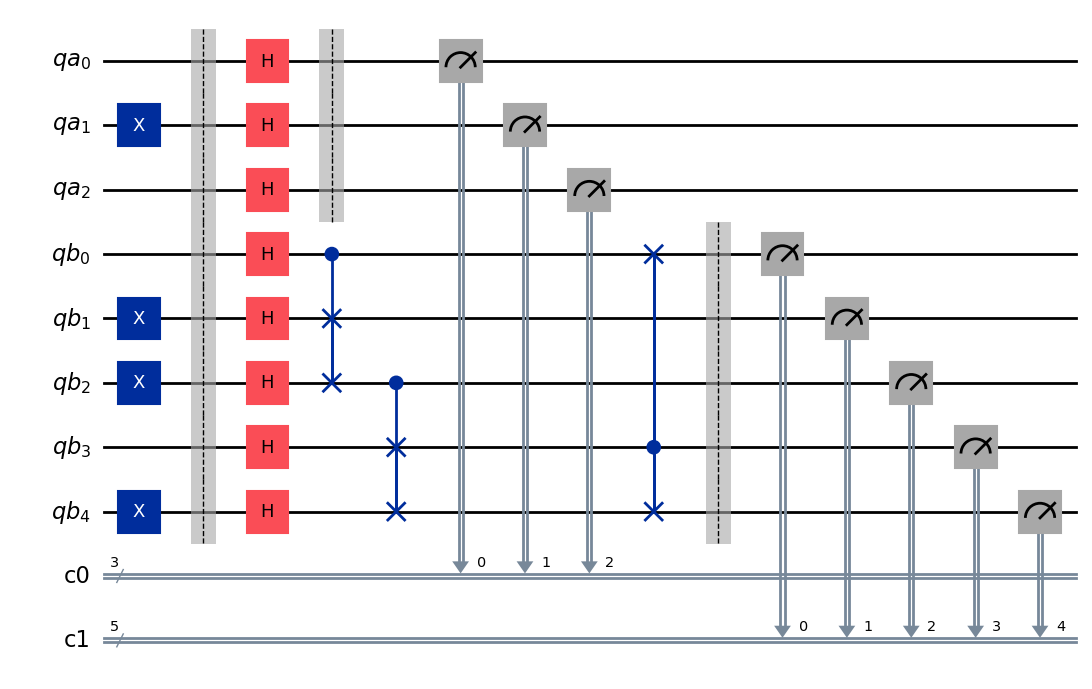

In [8]:
# Draw the circuit
circuit.draw(output='mpl')

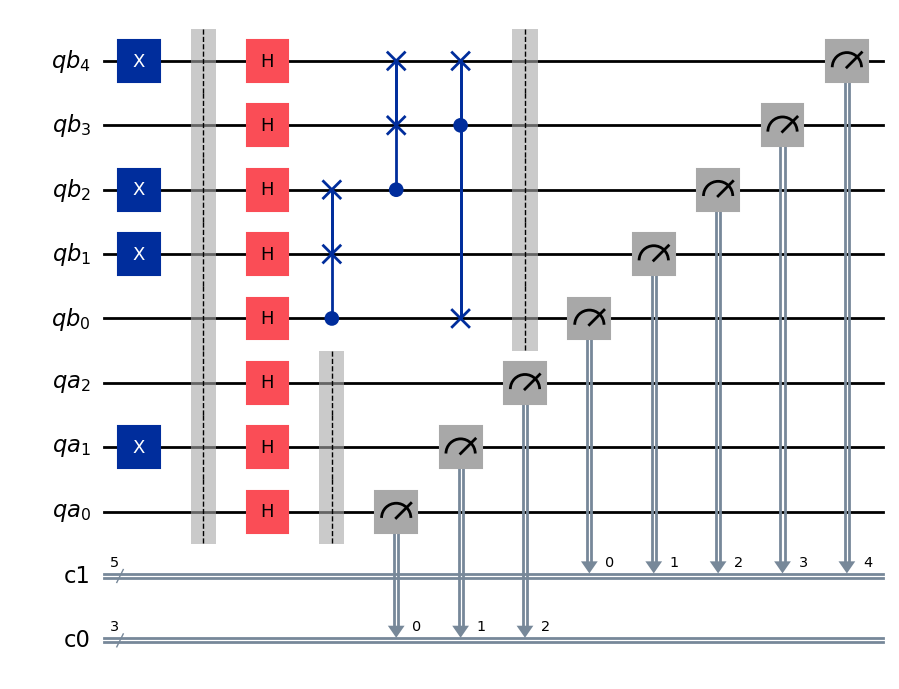

In [9]:
# Draw the circuit with reversed bit order
circuit.draw(output='mpl', reverse_bits=True)

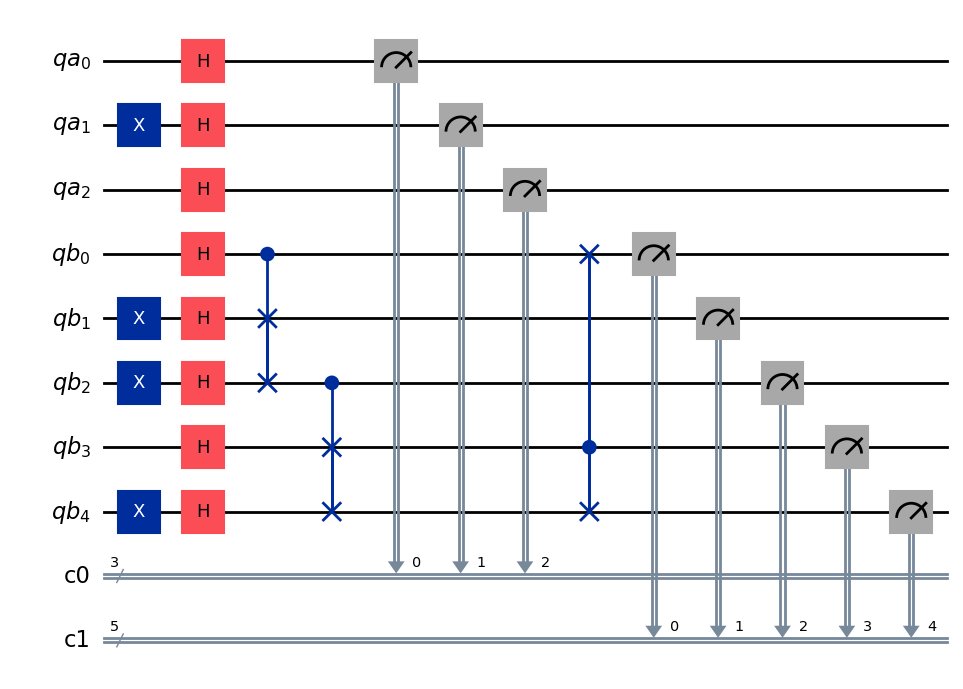

In [10]:
# Draw the circuit without barriers
circuit.draw(output='mpl', plot_barriers=False)

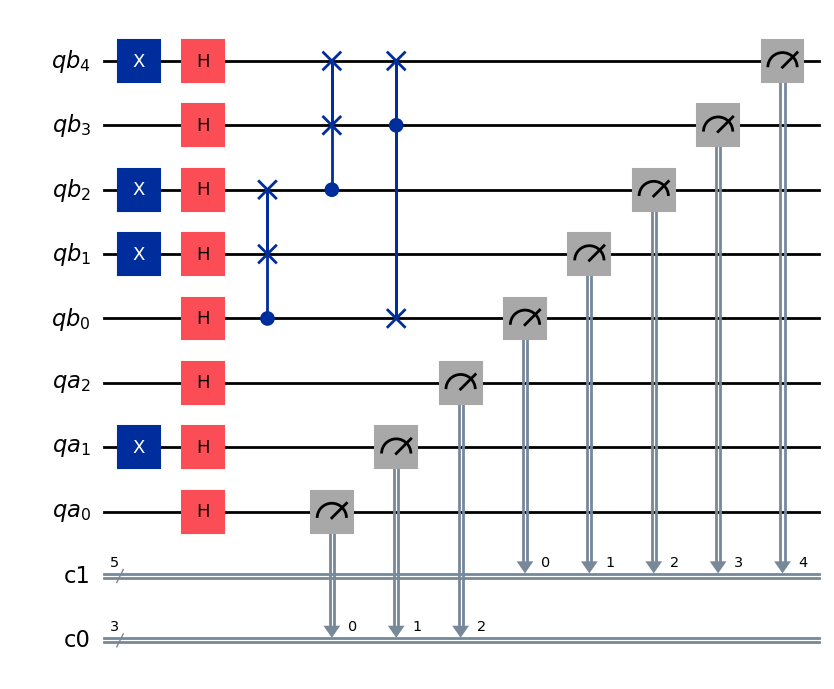

In [11]:
# Draw the circuit without barriers and reverse bit order
circuit.draw(output='mpl', plot_barriers=False, reverse_bits=True)

### Renderer-specific customizations

Some available customizing options are specific to a renderer.

The `line_length` kwarg for the `text` renderer can be used to set a maximum width for the output. When a diagram is wider than the maximum, it will wrap the diagram below.

The `mpl` renderer has the `style` kwarg, which is used to customize the output.

The `scale` option is used by the `mpl` and `latex` renderers to scale the size of the output image with a multiplicative adjustment factor.

The `style` kwarg takes in a `dict` with multiple options, including specifying colors, changing rendered text for different types of gates, choosing different line styles, and more.

Available options are:

- **textcolor** (str): The color code for text. Defaults to `'#000000'`
- **subtextcolor** (str): The color code for subtext. Defaults to `'#000000'`
- **linecolor** (str): The color code for lines. Defaults to `'#000000'`
- **creglinecolor** (str): The color code for classical register lines `'#778899'`
- **gatetextcolor** (str): The color code for gate text `'#000000'`
- **gatefacecolor** (str): The color code for gates. Defaults to `'#ffffff'`
- **barrierfacecolor** (str): The color code for barriers. Defaults to `'#bdbdbd'`
- **backgroundcolor** (str): The color code for the background. Defaults to `'#ffffff'`
- **fontsize** (int): The font size for text. Defaults to 13
- **subfontsize** (int): The font size for subtext. Defaults to 8
- **displaytext** (dict): A dictionary of the text for each element
    type in the output visualization. The default values are:


        'id': 'id',
        'u0': 'U_0',
        'u1': 'U_1',
        'u2': 'U_2',
        'u3': 'U_3',
        'x': 'X',
        'y': 'Y',
        'z': 'Z',
        'h': 'H',
        's': 'S',
        'sdg': 'S^\\dagger',
        't': 'T',
        'tdg': 'T^\\dagger',
        'rx': 'R_x',
        'ry': 'R_y',
        'rz': 'R_z',
        'reset': '\\left|0\\right\\rangle'


    You must specify all the necessary values if using this. There is
    no provision for an incomplete dict passed in.
- **displaycolor** (dict): The color codes to use for each circuit element.
    By default, all values default to the value of `gatefacecolor` and
    the keys are the same as `displaytext`. Also, just like
    `displaytext`, there is no provision for an incomplete dict passed
    in.
- **latexdrawerstyle** (bool): When set to True, enable LaTeX mode, which will
    draw gates like the `latex` output modes.
- **usepiformat** (bool): When set to True, use radians for output.
- **fold** (int): The number of circuit elements at which to fold the circuit.
    Defaults to 20
- **cregbundle** (bool): If set True, bundle classical registers.
- **showindex** (bool): If set True, draw an index.
- **compress** (bool): If set True, draw a compressed circuit.
- **figwidth** (int): The maximum width (in inches) for the output figure.
- **dpi** (int): The DPI to use for the output image. Defaults to 150.
- **creglinestyle** (str): The style of line to use for classical registers.
    Choices are `'solid'`, `'doublet'`, or any valid matplotlib
    `linestyle` kwarg value. Defaults to `doublet`.

In [12]:
# Set line length to 80 for above circuit
circuit.draw(output='text')

░ ┌───┐ ░    ┌─┐                           
qa_0: ──────░─┤ H ├─░────┤M├───────────────────────────
      ┌───┐ ░ ├───┤ ░    └╥┘┌─┐                        
qa_1: ┤ X ├─░─┤ H ├─░─────╫─┤M├────────────────────────
      └───┘ ░ ├───┤ ░     ║ └╥┘┌─┐                     
qa_2: ──────░─┤ H ├─░─────╫──╫─┤M├─────────────────────
            ░ ├───┤ ░     ║  ║ └╥┘    ░ ┌─┐            
qb_0: ──────░─┤ H ├─■─────╫──╫──╫──X──░─┤M├────────────
      ┌───┐ ░ ├───┤ │     ║  ║  ║  │  ░ └╥┘┌─┐         
qb_1: ┤ X ├─░─┤ H ├─X─────╫──╫──╫──┼──░──╫─┤M├─────────
      ├───┤ ░ ├───┤ │     ║  ║  ║  │  ░  ║ └╥┘┌─┐      
qb_2: ┤ X ├─░─┤ H ├─X──■──╫──╫──╫──┼──░──╫──╫─┤M├──────
      └───┘ ░ ├───┤    │  ║  ║  ║  │  ░  ║  ║ └╥┘┌─┐   
qb_3: ──────░─┤ H ├────X──╫──╫──╫──■──░──╫──╫──╫─┤M├───
      ┌───┐ ░ ├───┤    │  ║  ║  ║  │  ░  ║  ║  ║ └╥┘┌─┐
qb_4: ┤ X ├─░─┤ H ├────X──╫──╫──╫──X──░──╫──╫──╫──╫─┤M├
      └───┘ ░ └───┘       ║  ║  ║     ░  ║  ║  ║  ║ └╥┘
c0: 3/════════════════════╩══╩══╩════════╬══╬══╬══╬══╬═
                          0  1  2        ║  ║  ║  ║  ║ 
c1: 5/═══════════════════════════════════╩══╩══╩══╩══╩═
                                         0  1  2  3  4

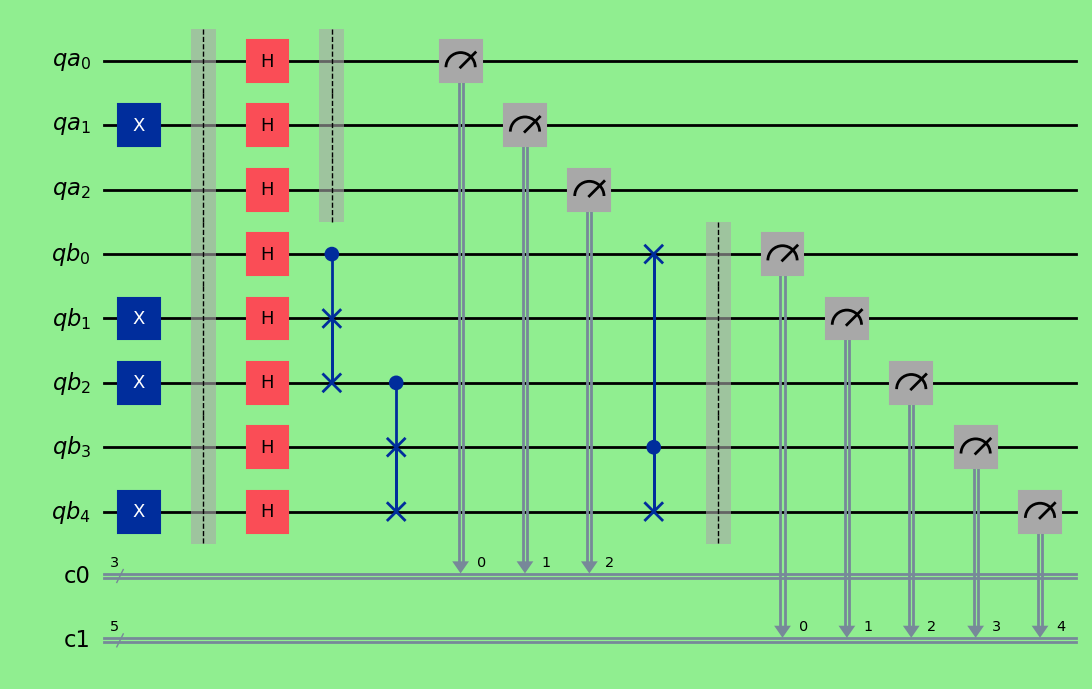

In [13]:
# Change the background color in mpl

style = {'backgroundcolor': 'lightgreen'}

circuit.draw(output='mpl', style=style)

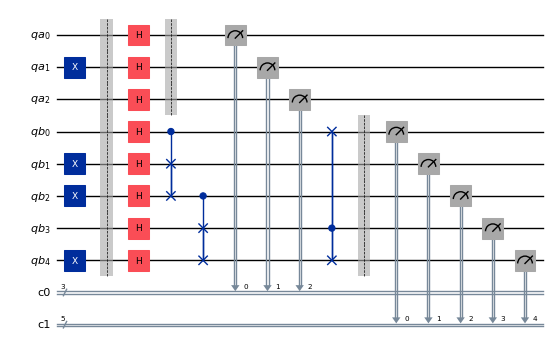

In [14]:
# Scale the mpl output to 1/2 the normal size
circuit.draw(output='mpl', scale=0.5)

### circuit_drawer() as function

If you have an application where you prefer to draw a circuit with a self-contained function instead of as a method of a circuit object, you can directly use the `circuit_drawer()` function, which is part of the public stable interface from `qiskit.visualization`. The function behaves identically to the `circuit.draw()` method, except that it takes in a circuit object as required argument.

<div class="alert alert-block alert-info">
<b>Note:</b> In Qiskit Terra <b> $<=$ 0.7, </b> the default behavior for the circuit_drawer()from qiskit.tools.visualization import circuit_drawer function is to use the <i>latex</i> output backend, and in <b>0.6.x</b> that includes a fallback to <i>mpl</i> if <i>latex</i> fails for any reason. Starting with release <b> > 0.7, </b>the default changes to the <i>text</i> output.
</div>

In [15]:
from qiskit.visualization import circuit_drawer

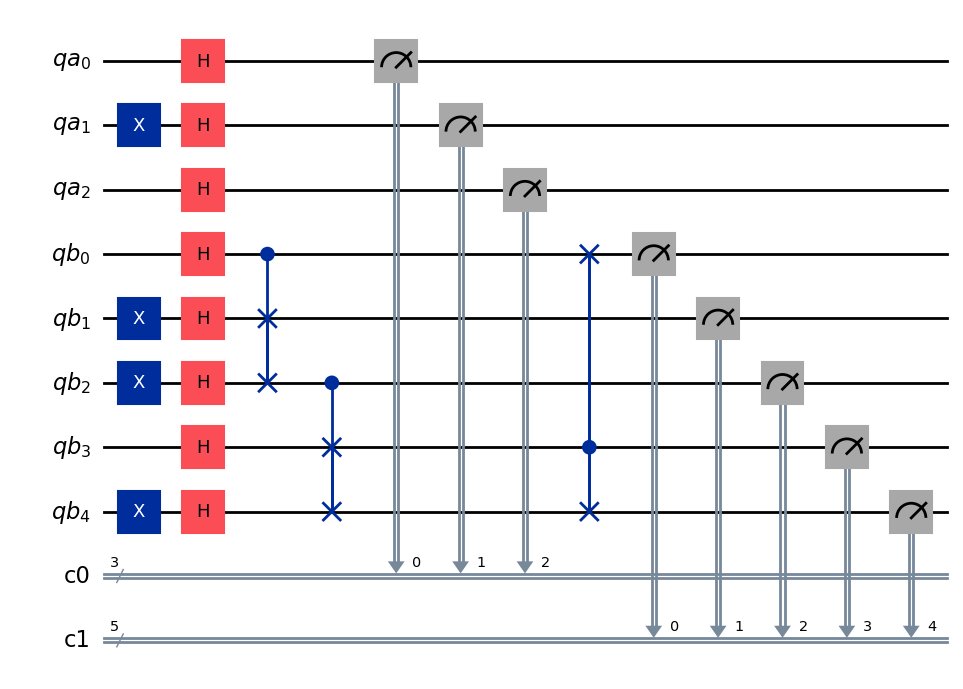

In [16]:
circuit_drawer(circuit, output='mpl', plot_barriers=False)

## Plot histogram <a name='histogram'></a>

The following function visualizes the data from a quantum circuit executed on a system or simulator.

`plot_histogram(data)`

For example, make a two-qubit Bell state:

In [17]:
from qiskit_aer import Aer

from qiskit import *
from qiskit.visualization import plot_histogram

In [18]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

# execute the quantum circuit
backend = Aer.get_backend('qasm_simulator') # the device to run on
circ = bell.compose(meas)
result = backend.run(circ, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'00': 504, '11': 496}


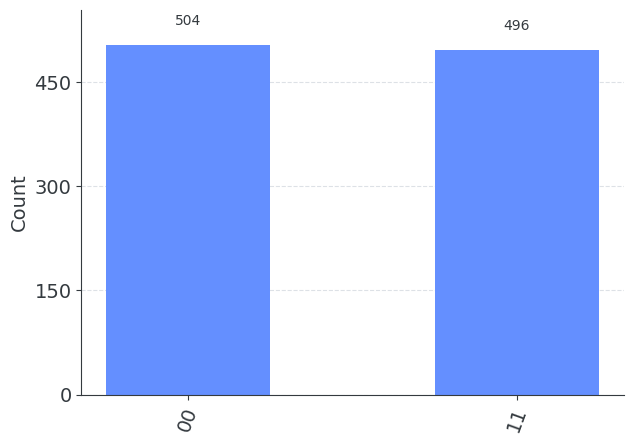

In [19]:
plot_histogram(counts)

### Options when plotting a histogram

Use the following options for `plot_histogram()` to adjust the output graph.

* `legend`: Provides a label for the executions. It takes a list of strings used to label each execution's results. This is mostly useful when plotting multiple execution results in the same histogram
* `sort`: Adjusts the order the bars in the histogram are rendered. It can be set to either ascending order with `asc` or descending order with `desc`
* `number_to_keep`: Takes an integer for the number of terms to show. The rest are grouped together in a single bar called "rest"
* `color`: Adjusts the color of the bars; takes a string or a list of strings for the colors to use for the bars for each execution.
* `bar_labels`: Adjusts whether labels are printed above the bars
* `figsize`: Takes a tuple of the size in inches to make the output figure

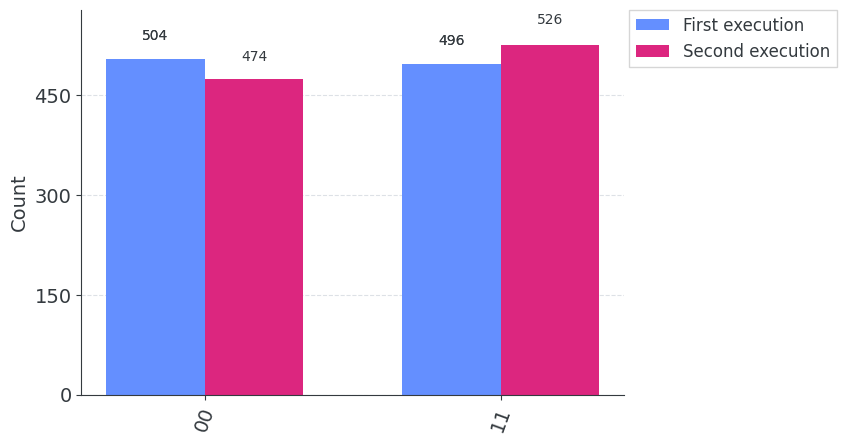

In [20]:
# Execute two-qubit Bell state again
second_result = backend.run(circ, shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

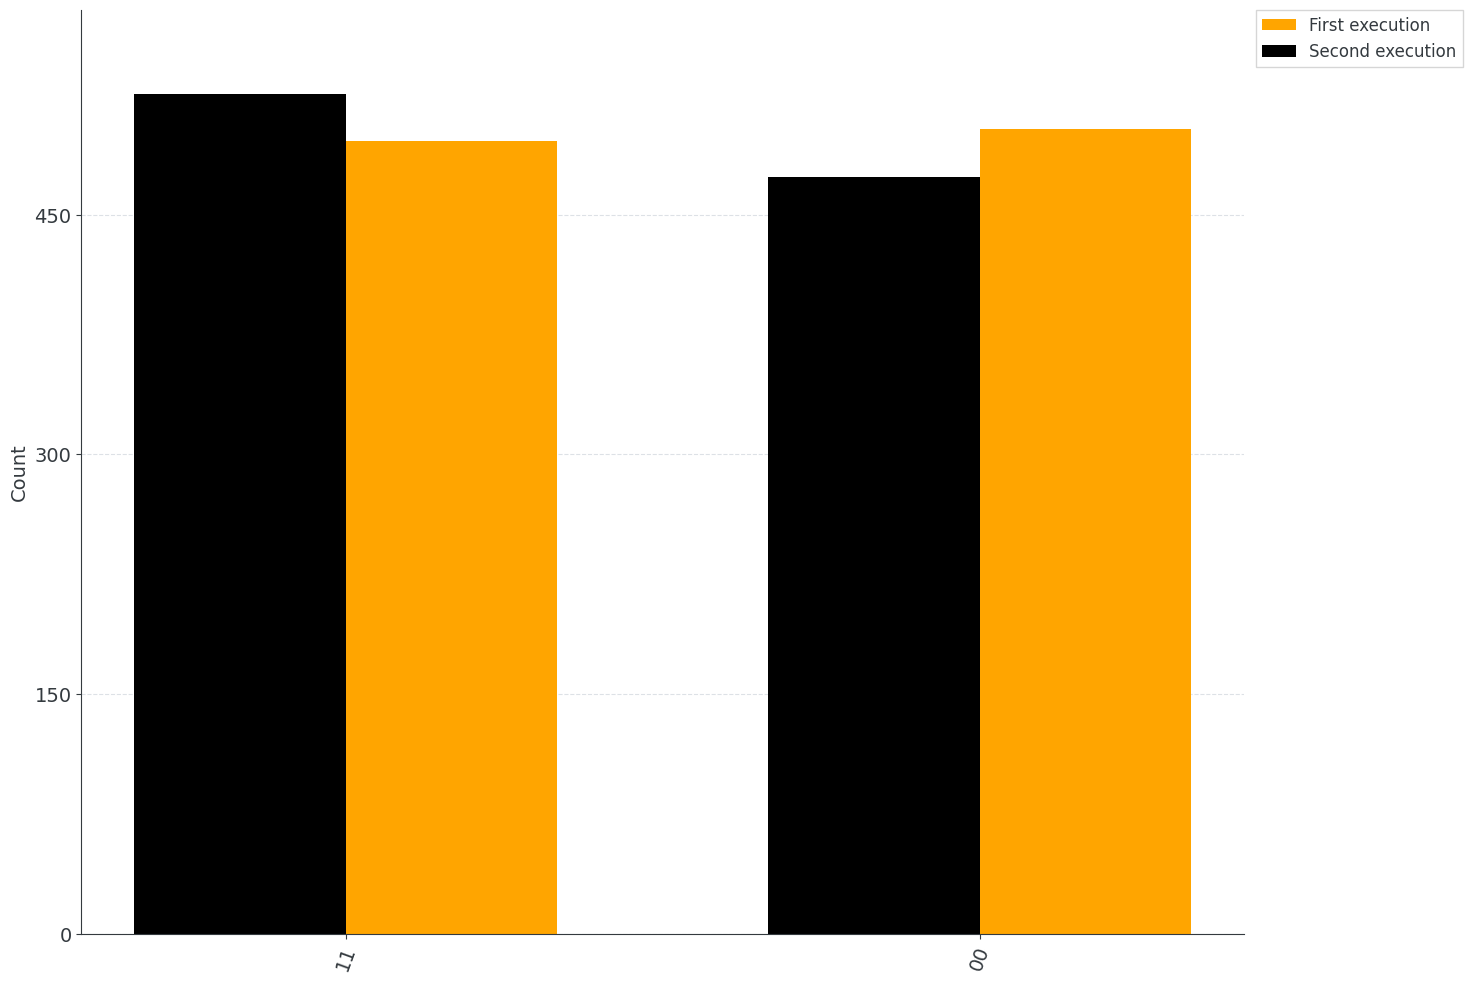

In [21]:
plot_histogram([counts, second_counts], legend=legend, sort='desc', figsize=(15,12),
               color=['orange', 'black'], bar_labels=False)

### Use the output from plot_histogram()

When using the `plot_histogram()` function, it returns a `matplotlib.Figure` for the rendered visualization. Jupyter notebooks understand this return type and render it properly, but when running outside of Jupyter,this feature is not automatic. However, the `matplotlib.Figure` class natively has methods to both display and save the visualization. You can call `.show()` on the returned object from `plot_histogram()` to open the image in a new window (assuming your configured matplotlib backend is interactive). Alternatively, call `.savefig('out.png')` to save the figure to `out.png`. The `savefig()` method takes a path so you can adjust the location and filename where you're saving the output.

## Plot state <a name='state'></a>

In many situations it is helpful to see the state of a quantum computer - perhaps for debugging purposes. Here we assume you have a particular state (either from simulation or state tomography), and the goal is to visualize the quantum state. This requires exponential resources, so we advise to only view the state of small quantum systems. There are several functions for generating different types of visualization of a quantum state:

```
plot_state_city(quantum_state)
plot_state_qsphere(quantum_state)
plot_state_paulivec(quantum_state)
plot_state_hinton(quantum_state)
plot_bloch_multivector(quantum_state)
```

A quantum state is either a density matrix $\rho$ (Hermitian matrix) or statevector $|\psi\rangle$ (complex vector). The density matrix is related to the statevector by

$$\rho = |\psi\rangle\langle \psi|,$$

and is more general as it can represent mixed states (positive sum of statevectors)

$$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k |.$$

The visualizations generated by the functions are:

- `'plot_state_city'`: The standard view for quantum states where the real and imaginary (imag) parts of the density matrix are plotted like a city.

- `'plot_state_qsphere'`: The Qiskit-unique view of a quantum state where the amplitude and phase of the state vector are plotted in a spherical ball. The amplitude is the thickness of the arrow and the phase is the color. For mixed states it will show different `'qsphere'` for each component.

- `'plot_state_paulivec'`: The representation of the density matrix using Pauli operators as the basis $\rho=\sum_{q=0}^{d^2-1}p_jP_j/d$.

- `'plot_state_hinton'`: Same as `'city'` but where the size of the element represents the value of the matrix element.

- `'plot_bloch_multivector'`: The projection of the quantum state onto the single-qubit space and plotting on a Bloch sphere.

In [22]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [23]:
# execute the quantum circuit
backend = Aer.get_backend('statevector_simulator') # the device to run on
result = backend.run(bell).result()
psi  = result.get_statevector(bell)

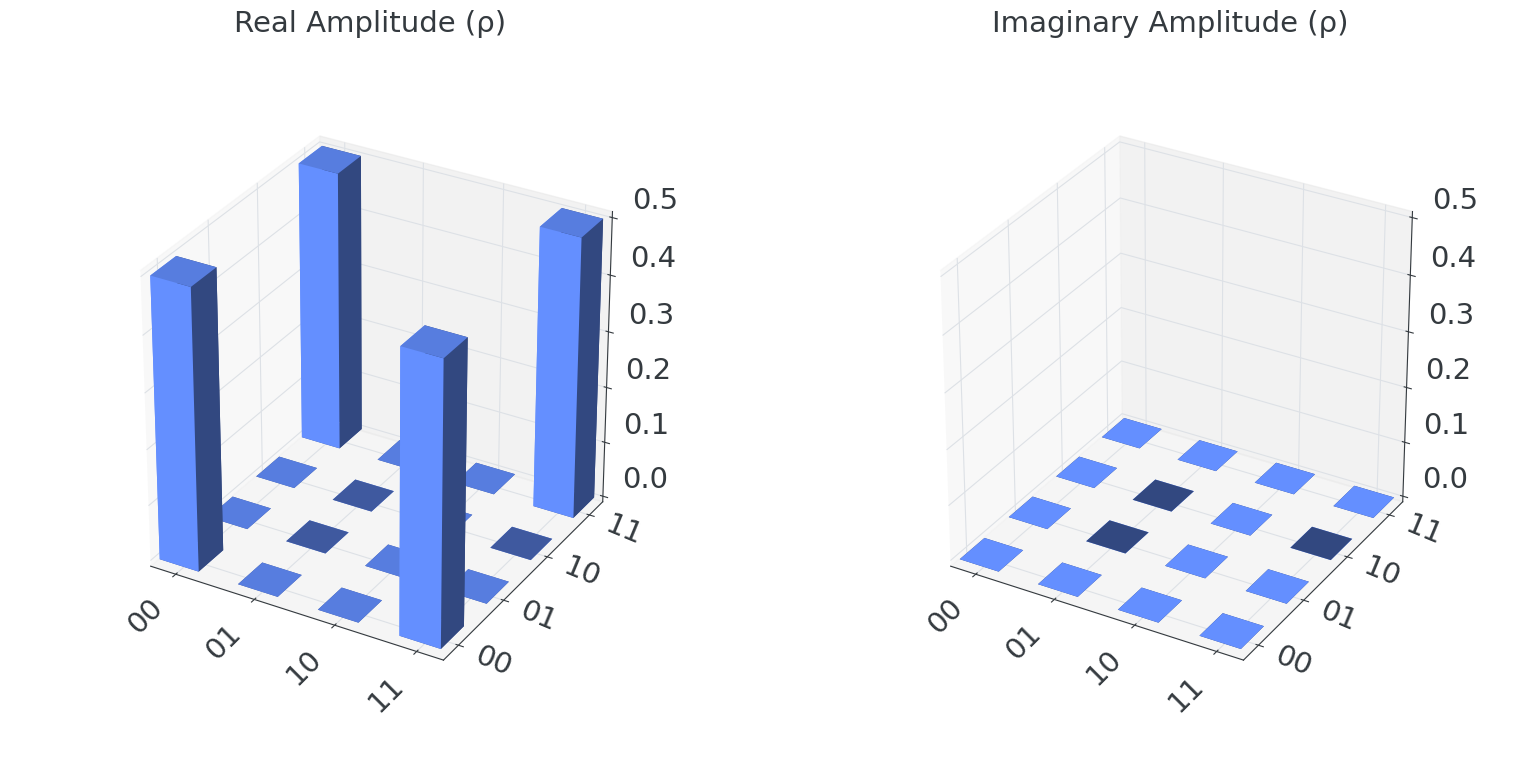

In [24]:
plot_state_city(psi)

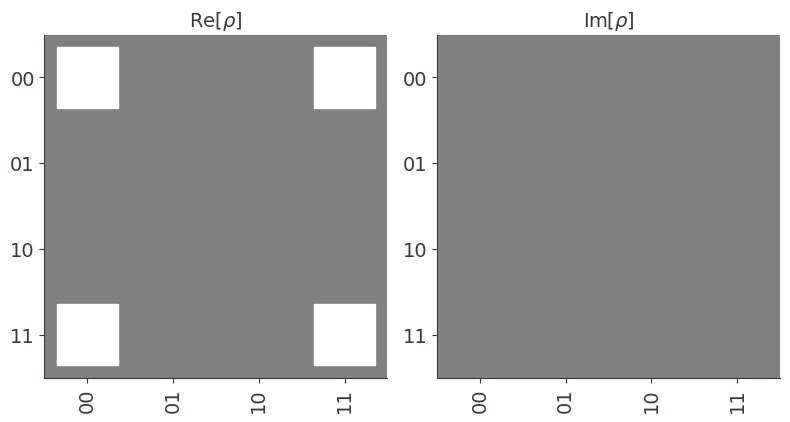

In [25]:
plot_state_hinton(psi)

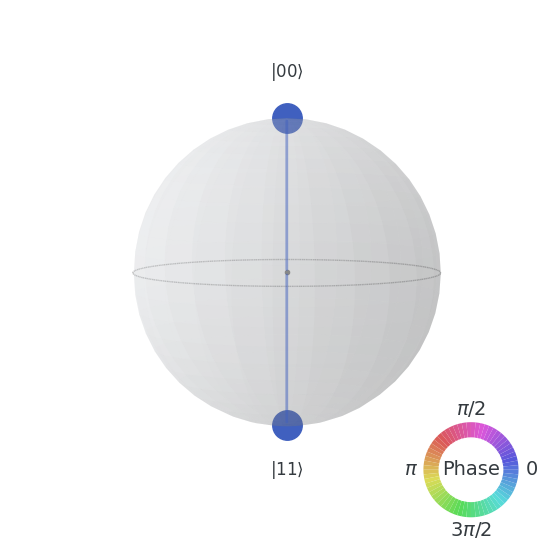

In [26]:
plot_state_qsphere(psi)

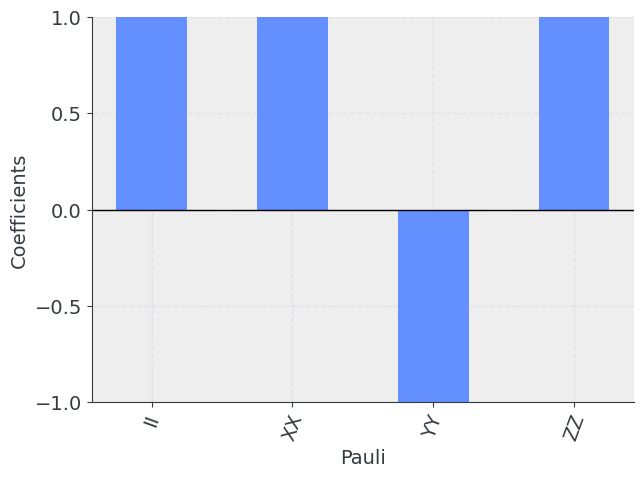

In [27]:
plot_state_paulivec(psi)

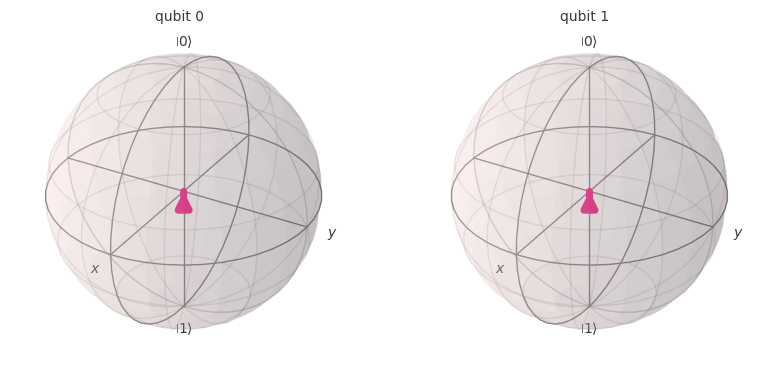

In [28]:
plot_bloch_multivector(psi)

Here we see that there is no information about the quantum state in the single-qubit space as all vectors are zero.

### Options when using state plotting functions

The various functions for plotting quantum states provide a number of options to adjust how the plots are rendered. Which options are available depends on the function being used.

#### **plot_state_city()** options

- **title** (str): a string that represents the plot title
- **figsize** (tuple): figure size in inches (width, height)
- **color** (list): a list of len=2 giving colors for real and imaginary components of matrix elements

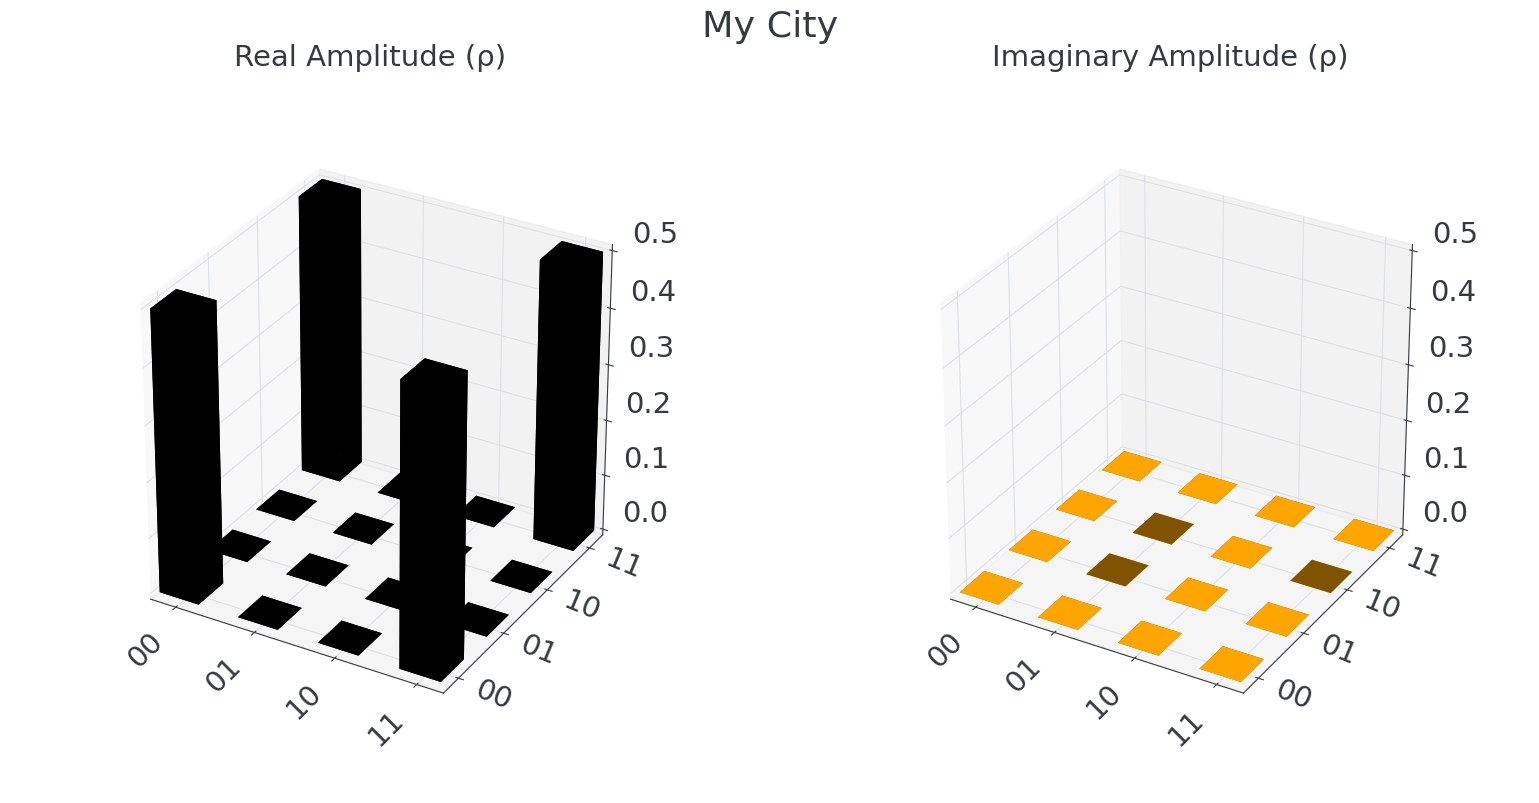

In [29]:
plot_state_city(psi, title="My City", color=['black', 'orange'])

#### **plot_state_hinton()** options

- **title** (str): a string that represents the plot title
- **figsize** (tuple): figure size in inches (width, height)

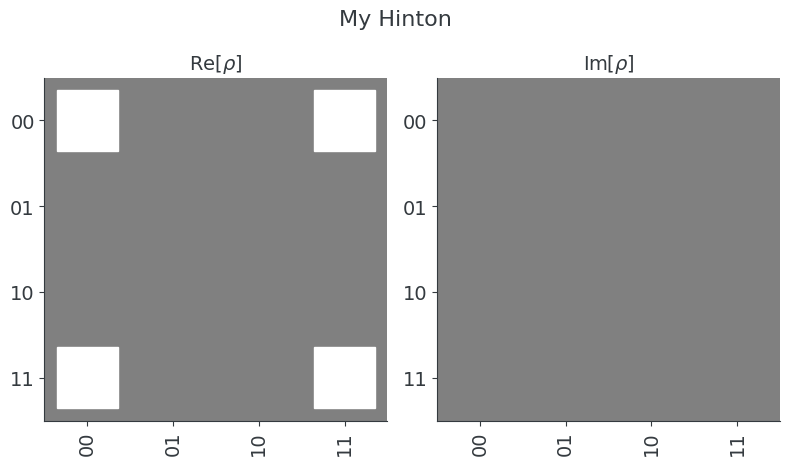

In [30]:
plot_state_hinton(psi, title="My Hinton")

#### **plot_state_paulivec()** options

- **title** (str): a string that represents the plot title
- **figsize** (tuple): figure size in inches (width, height)
- **color** (list or str): color of the expectation value bars

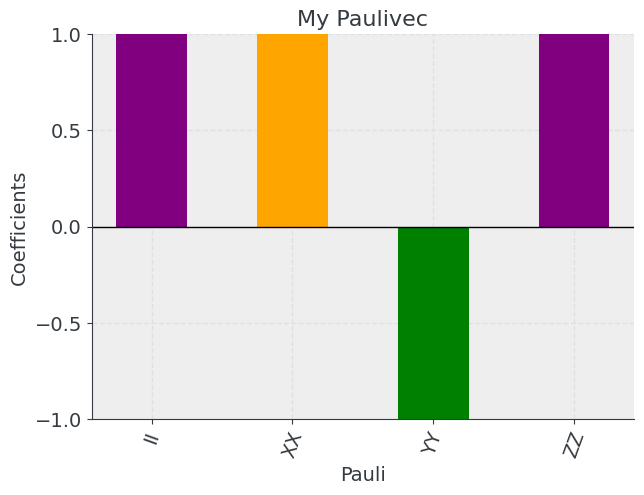

In [31]:
plot_state_paulivec(psi, title="My Paulivec", color=['purple', 'orange', 'green'])

#### **plot_state_qsphere()** options

- **figsize** (tuple): figure size in inches (width, height)

#### **plot_bloch_multivector()** options

- **title** (str): a string that represents the plot title
- **figsize** (tuple): figure size in inches (width, height)

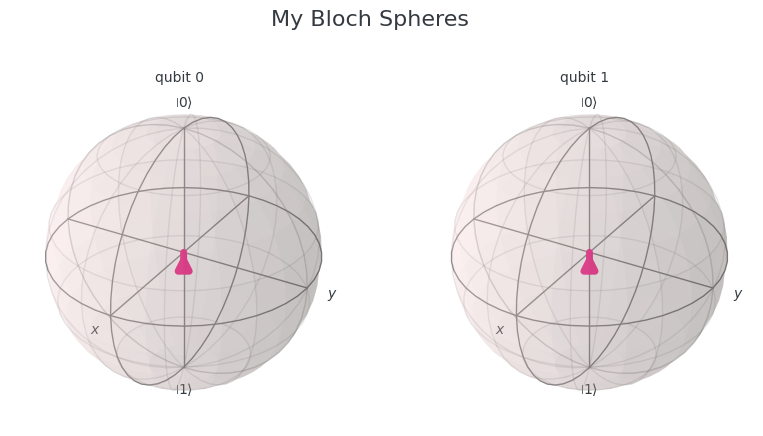

In [32]:
plot_bloch_multivector(psi, title="My Bloch Spheres")

### Use the output from state plotting functions

The state plotting functions return a `matplotlib.Figure` for the rendered visualization. Jupyter notebooks understand this return type and render it properly, but when running outside of Jupyter, this feature is not automatic. However, the `matplotlib.Figure` class natively has methods to both display and save the visualization. You can call `.show()` on the returned object to open the image in a new window (assuming your configured matplotlib backend is interactive). Alternatively, call `.savefig('out.png')` to save the figure to `out.png` in the current working directory. The `savefig()` method takes a path so you can adjust the location and filename where you're saving the output.

## Plot Bloch vector <a name='bloch'></a>

A standard way to plot a quantum system is with the Bloch vector. This only works for a single qubit and takes as input the Bloch vector.

The Bloch vector is defined as $[x = \mathrm{Tr}[X \rho], y = \mathrm{Tr}[Y \rho], z = \mathrm{Tr}[Z \rho]]$, where $X$, $Y$, and $Z$ are the Pauli operators for a single qubit and $\rho$ is the density matrix.

In [33]:
from qiskit.visualization import plot_bloch_vector

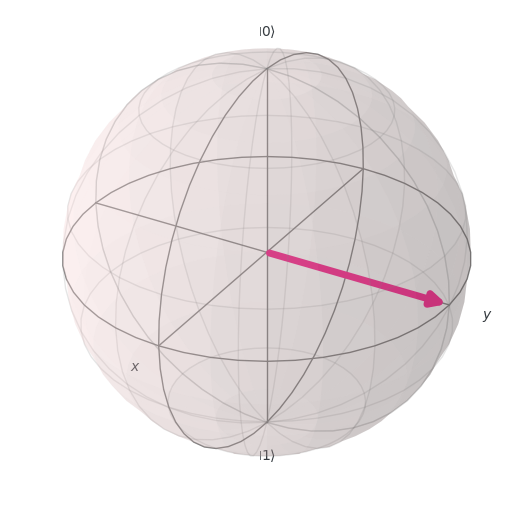

In [34]:
plot_bloch_vector([0,1,0])

### Options for plot_bloch_vector()

- **title** (str): a string that represents the plot title
- **figsize** (tuple): Figure size in inches (width, height)

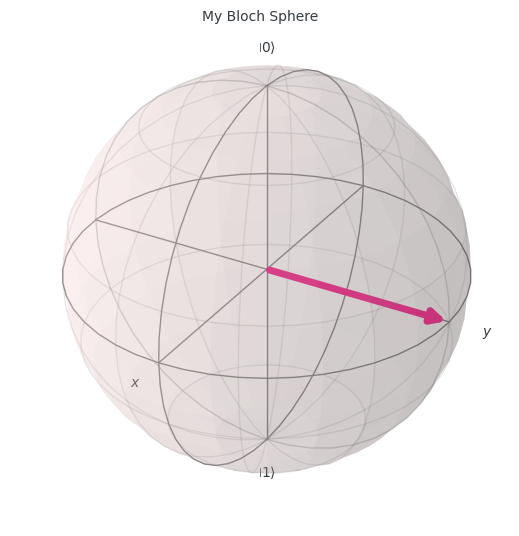

In [35]:
plot_bloch_vector([0,1,0], title='My Bloch Sphere')

### Adjust the output from plot_bloch_vector()

The `plot_bloch_vector` function returns a `matplotlib.Figure` for the rendered visualization. Jupyter notebooks understand this return type and render it properly, but when running outside of Jupyter, this feature is not automatic. However, the `matplotlib.Figure` class natively has methods to both display and save the visualization. You can call `.show()` on the returned object to open the image in a new window (assuming your configured matplotlib backend is interactive). Alternatively, call `.savefig('out.png')` to save the figure to `out.png` in the current working directory. The `savefig()` method takes a path so you can adjust the location and filename where you're saving the output.

## Next steps

<Admonition type="tip" title="Recommendations">
  -  See an example of circuit visualization in the [Grover's Algorithm](https://learning.quantum.ibm.com/tutorial/grovers-algorithm) tutorial.
  -  Visualize simple circuits in the [Explore gates and circuits with the Quantum Composer](https://learning.quantum.ibm.com/tutorial/explore-gates-and-circuits-with-the-quantum-composer) tutorial.
  -  Review the [Qiskit visualizations API documentation](/api/qiskit/visualization).
</Admonition>